In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from HARK.utilities import make_figs

from estimark.agents import (
    BequestWarmGlowLifeCyclePortfolioType,
    PortfolioLifeCycleConsumerType,
    WealthPortfolioLifeCycleConsumerType,
)
from estimark.estimation import prepare_model
from estimark.scf import scf_data
from estimark.snp import snp_data_full

# results_dir = "../../docs/tables/TRP/"  # This is AEL's
results_dir = "../estimark/docs/tables/min/" # This is MNW's

In [2]:
csv_file_path = results_dir + "PortfolioG_estimate_results.csv"
res = pd.read_csv(csv_file_path, header=None)
res = res.set_index(res.columns[0])[res.columns[1]].to_dict()

In [3]:
portfolio_agent, emp_moments, weights, obj_func_portfolio, sim_func_portfolio, plot_portfolio = prepare_model("Portfolio", ["CRRA"])
portfolio_est_params = [float(res["CRRA"])]
print("CRRA", portfolio_est_params[0])

CRRA 9.19534448626031


In [4]:
csv_file_path = results_dir + "WarmGlowPortfolioG_estimate_results.csv"
res = pd.read_csv(csv_file_path, header=None)
res = res.set_index(res.columns[0])[res.columns[1]].to_dict()

In [5]:
warmglow_agent, emp_moments, weights, obj_func_warmglow, sim_func_warmglow, plot_warmglow = prepare_model("WarmGlowPortfolio", ["CRRA", "BeqMPC", "BeqInt"])
warmglow_est_params = [float(res["CRRA"]), float(res["BeqMPC"]), float(res["BeqInt"])]
print("CRRA", warmglow_est_params[0])
print("BeqMPC", warmglow_est_params[1])
print("BeqInt", warmglow_est_params[2])

CRRA 4.594161282187065
BeqMPC 0.11184864364212793
BeqInt 0.3210043794281597


In [6]:
csv_file_path = results_dir + "WealthPortfolioG_estimate_results.csv"
res = pd.read_csv(csv_file_path, header=None)
res = res.set_index(res.columns[0])[res.columns[1]].to_dict()

In [7]:
trp_agent, emp_moments, weights, obj_func_trp, sim_func_trp, plot_trp = prepare_model("WealthPortfolio", ["CRRA", "WealthShare"])
trp_est_params = [float(res["CRRA"]), float(res["WealthShare"])]
print("CRRA", trp_est_params[0])
print("WealthShare", trp_est_params[1])

CRRA 5.135807078192237
WealthShare 0.2478971572835353


In [8]:
agents = [portfolio_agent, warmglow_agent, trp_agent]

In [9]:
port_sim_moments = sim_func_portfolio(portfolio_est_params)
warmglow_sim_moments = sim_func_warmglow(warmglow_est_params)
trp_sim_moments = sim_func_trp(trp_est_params)

In [10]:
def convert_wealth_moments_to_vec(dict_in):
    vec_out = np.array([
        dict_in["(25,30]"],
        dict_in["(30,35]"],
        dict_in["(35,40]"],
        dict_in["(40,45]"],
        dict_in["(45,50]"],
        dict_in["(50,55]"],
        dict_in["(55,60]"],
        dict_in["(70,75]"],
        dict_in["(75,80]"],
        dict_in["(80,85]"],
        dict_in["(85,90]"],
        dict_in["(90,95]"],
    ])
    return vec_out

def convert_share_moments_to_vec(dict_in):
    vec_out = np.array([
        dict_in["(70,75]_port"],
        dict_in["(75,80]_port"],
        dict_in["(80,85]_port"],
        dict_in["(85,90]_port"],
        dict_in["(90,95]_port"],
    ])
    return vec_out

In [11]:
portfolio_wealth_moments = convert_wealth_moments_to_vec(port_sim_moments)
warmglow_wealth_moments = convert_wealth_moments_to_vec(warmglow_sim_moments)
trp_wealth_moments = convert_wealth_moments_to_vec(trp_sim_moments)
emp_wealth_moments = convert_wealth_moments_to_vec(emp_moments)
portfolio_share_moments = convert_share_moments_to_vec(port_sim_moments)
warmglow_share_moments = convert_share_moments_to_vec(warmglow_sim_moments)
trp_share_moments = convert_share_moments_to_vec(trp_sim_moments)
emp_share_moments = convert_share_moments_to_vec(emp_moments)
age_vec_young = np.array([28, 33, 38, 43, 48, 53, 58])
age_vec_old = np.array([73, 78, 83, 88, 93])

Saving figure WealthMomentFit in 


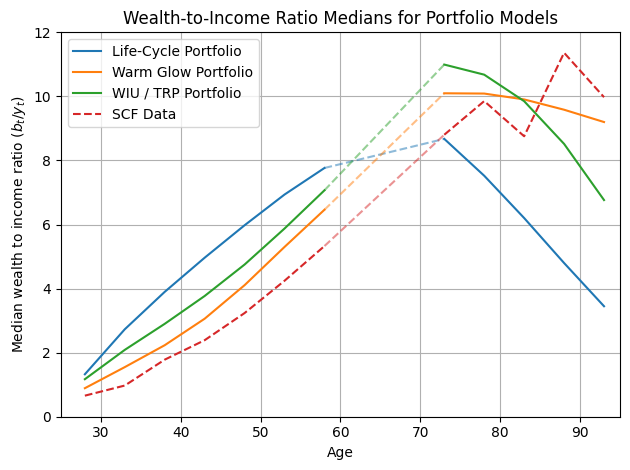

In [12]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']

plt.plot(age_vec_young, portfolio_wealth_moments[:7], '-', color=colors[0], label="Life-Cycle Portfolio")
plt.plot([age_vec_young[-1], age_vec_old[0]], portfolio_wealth_moments[6:8], '--', color=colors[0], alpha=0.5)
plt.plot(age_vec_old, portfolio_wealth_moments[7:], '-', color=colors[0])

plt.plot(age_vec_young, warmglow_wealth_moments[:7], '-', color=colors[1], label="Warm Glow Portfolio")
plt.plot([age_vec_young[-1], age_vec_old[0]], warmglow_wealth_moments[6:8], '--', color=colors[1], alpha=0.5)
plt.plot(age_vec_old, warmglow_wealth_moments[7:], '-', color=colors[1])

plt.plot(age_vec_young, trp_wealth_moments[:7], '-', color=colors[2], label="WIU / TRP Portfolio")
plt.plot([age_vec_young[-1], age_vec_old[0]], trp_wealth_moments[6:8], '--', color=colors[2], alpha=0.5)
plt.plot(age_vec_old, trp_wealth_moments[7:], '-', color=colors[2])

plt.plot(age_vec_young, emp_wealth_moments[:7], '--', color=colors[3], label="SCF Data")
plt.plot([age_vec_young[-1], age_vec_old[0]], emp_wealth_moments[6:8], '--', color=colors[3], alpha=0.5)
plt.plot(age_vec_old, emp_wealth_moments[7:], '--', color=colors[3])

plt.xlabel('Age')
plt.ylabel(r"Median wealth to income ratio ($b_t/y_t$)")
plt.title("Wealth-to-Income Ratio Medians for Portfolio Models")
plt.xlim(25, 95)
plt.ylim(0.0, 12.0)
plt.grid()
plt.legend()
plt.tight_layout()
make_figs("WealthMomentFit", True, True, target_dir="")

Saving figure ShareMomentFit in 


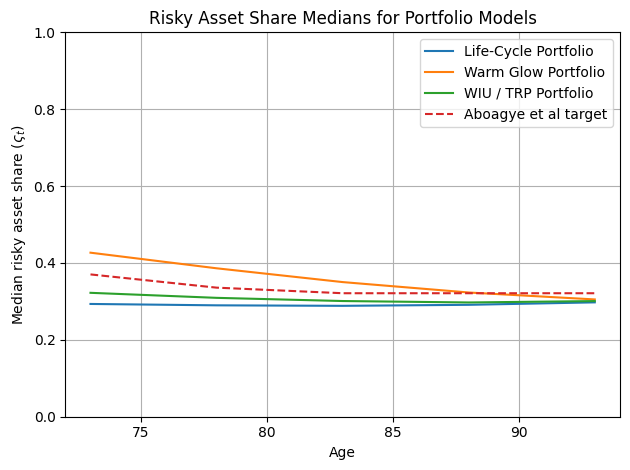

In [13]:
plt.plot(age_vec_old, portfolio_share_moments, '-', color=colors[0], label="Life-Cycle Portfolio")
plt.plot(age_vec_old, warmglow_share_moments, '-', color=colors[1], label="Warm Glow Portfolio")
plt.plot(age_vec_old, trp_share_moments, '-', color=colors[2], label="WIU / TRP Portfolio")
plt.plot(age_vec_old, emp_share_moments, '--', color=colors[3], label="Aboagye et al target")

plt.xlabel('Age')
plt.ylabel(r"Median risky asset share ($\varsigma_t$)")
plt.title("Risky Asset Share Medians for Portfolio Models")
plt.xlim(72, 94)
plt.xticks([75,80,85,90])
plt.ylim(0.0, 1.0)
plt.grid()
plt.legend()
plt.tight_layout()
make_figs("ShareMomentFit", True, True, target_dir="")

In [14]:
turn_off_BM_sim_moments = sim_func_warmglow([warmglow_est_params[0], warmglow_est_params[1], warmglow_est_params[2] + 1000.])
turn_off_BM_wealth_moments = convert_wealth_moments_to_vec(turn_off_BM_sim_moments)

In [15]:
turn_off_BM_wealth_moments

array([0.76471661, 1.21270169, 1.69629084, 2.27186056, 2.96140896,
       3.77935782, 4.56998758, 5.59020593, 4.60889622, 3.42869261,
       2.29098801, 1.34922664])

Saving figure StrongBequestMotive in 


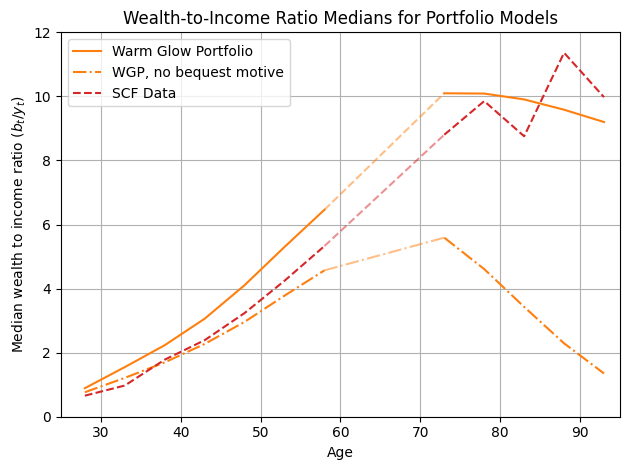

In [16]:
plt.plot(age_vec_young, warmglow_wealth_moments[:7], '-', color=colors[1], label="Warm Glow Portfolio")
plt.plot([age_vec_young[-1], age_vec_old[0]], warmglow_wealth_moments[6:8], '--', color=colors[1], alpha=0.5)
plt.plot(age_vec_old, warmglow_wealth_moments[7:], '-', color=colors[1])

plt.plot(age_vec_young, turn_off_BM_wealth_moments[:7], '-.', color=colors[1], label="WGP, no bequest motive")
plt.plot([age_vec_young[-1], age_vec_old[0]], turn_off_BM_wealth_moments[6:8], '-.', color=colors[1], alpha=0.5)
plt.plot(age_vec_old, turn_off_BM_wealth_moments[7:], '-.', color=colors[1])

plt.plot(age_vec_young, emp_wealth_moments[:7], '--', color=colors[3], label="SCF Data")
plt.plot([age_vec_young[-1], age_vec_old[0]], emp_wealth_moments[6:8], '--', color=colors[3], alpha=0.5)
plt.plot(age_vec_old, emp_wealth_moments[7:], '--', color=colors[3])

plt.xlabel('Age')
plt.ylabel(r"Median wealth to income ratio ($b_t/y_t$)")
plt.title("Wealth-to-Income Ratio Medians for Portfolio Models")
plt.xlim(25, 95)
plt.ylim(0.0, 12.0)
plt.grid()
plt.legend()
plt.tight_layout()
make_figs("StrongBequestMotive", True, True, target_dir="")

In [17]:
csv_file_path = results_dir + "PortfolioG(Stock)_estimate_results.csv"
res = pd.read_csv(csv_file_path, header=None)
res = res.set_index(res.columns[0])[res.columns[1]].to_dict()
portfolio_stock_agent, emp_moments, weights, obj_func_portfolio_stock, sim_func_portfolio_stock, plot_portfolio_stock = prepare_model("Portfolio(Stock)", ["CRRA"])
portfolio_stock_est_params = [float(res["CRRA"])]
print("CRRA", portfolio_stock_est_params[0])

CRRA 8.930283812339272


In [18]:
csv_file_path = results_dir + "WarmGlowPortfolioG(Stock)_estimate_results.csv"
res = pd.read_csv(csv_file_path, header=None)
res = res.set_index(res.columns[0])[res.columns[1]].to_dict()
warmglow_stock_agent, emp_moments, weights, obj_func_warmglow_stock, sim_func_warmglow_stock, plot_warmglow_stock = prepare_model("WarmGlowPortfolio(Stock)", ["CRRA", "BeqMPC", "BeqInt"])
warmglow_stock_est_params = [float(res["CRRA"]), float(res["BeqMPC"]), float(res["BeqInt"])]
print("CRRA", warmglow_stock_est_params[0])
print("BeqMPC", warmglow_stock_est_params[1])
print("BeqInt", warmglow_stock_est_params[2])

CRRA 3.2557704838489396
BeqMPC 0.051299451954576906
BeqInt 0.7286639225246299


In [19]:
csv_file_path = results_dir + "WealthPortfolioG(Stock)_estimate_results.csv"
res = pd.read_csv(csv_file_path, header=None)
res = res.set_index(res.columns[0])[res.columns[1]].to_dict()
trp_stock_agent, emp_moments, weights, obj_func_trp_stock, sim_func_trp_stock, plot_trp_stock = prepare_model("WealthPortfolio(Stock)", ["CRRA", "WealthShare"])
trp_stock_est_params = [float(res["CRRA"]), float(res["WealthShare"])]
print("CRRA", trp_stock_est_params[0])
print("WealthShare", trp_stock_est_params[1])

CRRA 2.8394739862618974
WealthShare 0.23618862258746515


In [20]:
port_stock_sim_moments = sim_func_portfolio_stock(portfolio_stock_est_params)
warmglow_stock_sim_moments = sim_func_warmglow_stock(warmglow_stock_est_params)
trp_stock_sim_moments = sim_func_trp_stock(trp_stock_est_params)

portfolio_stock_wealth_moments = convert_wealth_moments_to_vec(port_stock_sim_moments)
warmglow_stock_wealth_moments = convert_wealth_moments_to_vec(warmglow_stock_sim_moments)
trp_stock_wealth_moments = convert_wealth_moments_to_vec(trp_stock_sim_moments)
portfolio_stock_share_moments = convert_share_moments_to_vec(port_stock_sim_moments)
warmglow_stock_share_moments = convert_share_moments_to_vec(warmglow_stock_sim_moments)
trp_stock_share_moments = convert_share_moments_to_vec(trp_stock_sim_moments)

In [21]:
port_alt_sim_moments = sim_func_portfolio(portfolio_stock_est_params)
warmglow_alt_sim_moments = sim_func_warmglow(warmglow_stock_est_params)
trp_alt_sim_moments = sim_func_trp(trp_stock_est_params)

portfolio_alt_wealth_moments = convert_wealth_moments_to_vec(port_alt_sim_moments)
warmglow_alt_wealth_moments = convert_wealth_moments_to_vec(warmglow_alt_sim_moments)
trp_alt_wealth_moments = convert_wealth_moments_to_vec(trp_alt_sim_moments)
portfolio_alt_share_moments = convert_share_moments_to_vec(port_alt_sim_moments)
warmglow_alt_share_moments = convert_share_moments_to_vec(warmglow_alt_sim_moments)
trp_alt_share_moments = convert_share_moments_to_vec(trp_alt_sim_moments)

Saving figure StockBeliefsShare in 


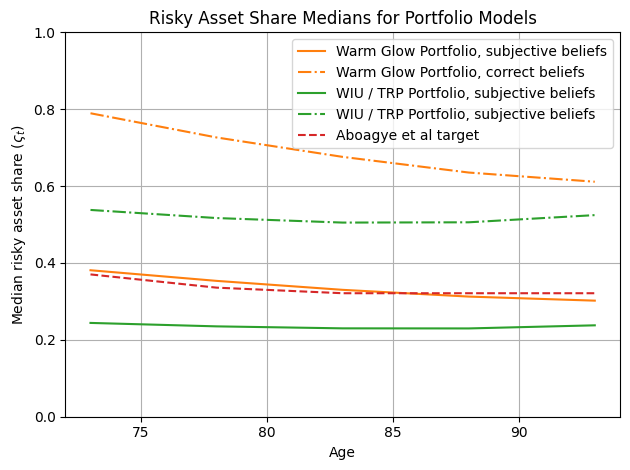

In [22]:
#plt.plot(age_vec_old, portfolio_stock_share_moments, '-', color=colors[0], label="Life-Cycle Portfolio")
#plt.plot(age_vec_old, portfolio_alt_share_moments, '-.', color=colors[0])
plt.plot(age_vec_old, warmglow_stock_share_moments, '-', color=colors[1], label="Warm Glow Portfolio, subjective beliefs")
plt.plot(age_vec_old, warmglow_alt_share_moments, '-.', color=colors[1], label="Warm Glow Portfolio, correct beliefs")
plt.plot(age_vec_old, trp_stock_share_moments, '-', color=colors[2], label="WIU / TRP Portfolio, subjective beliefs")
plt.plot(age_vec_old, trp_alt_share_moments, '-.', color=colors[2], label="WIU / TRP Portfolio, subjective beliefs")
plt.plot(age_vec_old, emp_share_moments, '--', color=colors[3], label="Aboagye et al target")

plt.xlabel('Age')
plt.ylabel(r"Median risky asset share ($\varsigma_t$)")
plt.title("Risky Asset Share Medians for Portfolio Models")
plt.xlim(72, 94)
plt.xticks([75,80,85,90])
plt.ylim(0.0, 1.0)
plt.grid()
plt.legend()
plt.tight_layout()
make_figs("StockBeliefsShare", True, True, target_dir="")